## Adaptive step-size algorithms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def sphere(x):
    return (np.sum(np.square(x)))

def elli(x):
    result = 0
    for i in range (0,len(x)):
        result+=(100**((i)/(len(x)-1))*x[i])**2
    return(result)

def one_one_ES(n,sigma,f,max_iter,x_init ):
    x= x_init
    n_iter=0
    best_value = []
    while(n_iter <max_iter):
        n_iter +=1
        x_ = x + sigma* np.random.multivariate_normal(np.zeros(n),np.identity(n),1)
        x_=x_[0]
        if (f(x_)< f(x)):
            x=x_
        best_value.append(f(x))
    return(best_value)

def one_one_ES_adap(n,sigma,f,max_iter,x_init ):
#     x = np.random.randint(3,size=n)
    x= x_init
    n_iter=0
    best_value = []
    sigma_value = [sigma]
    while(n_iter <max_iter):
        n_iter +=1
        x_ = x + sigma* np.random.multivariate_normal(np.zeros(n),np.identity(n),1)
        x_=x_[0]
        if (f(x_)< f(x)):
            x=x_
            sigma = 1.5 * sigma
        else:
            sigma = (1.5)**(-1/4)*sigma
        best_value.append(f(x)**(1/2))
        sigma_value.append(sigma)
    return(best_value ,sigma_value)

def rosenbrock(x):
    return(sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0))

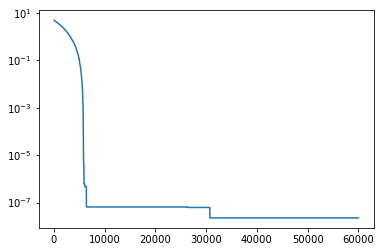

In [6]:
best_values =(one_one_ES(5,1e-3,sphere,60000,np.ones(5)))
plt.semilogy(best_values)

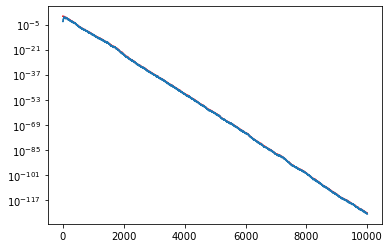

In [8]:
best_values,sigma_values =(one_one_ES_adap(5,1e-3,sphere,10000,np.ones(5)))

plt.semilogy(best_values,'r')

plt.semilogy(sigma_values)

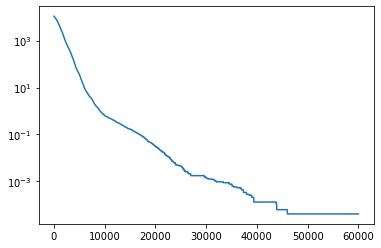

In [9]:
best_values =(one_one_ES(5,1e-3,elli,60000,np.ones(5)))
plt.semilogy(best_values)

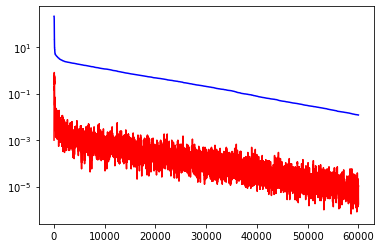

In [10]:
best_values,sigma_values =(one_one_ES_adap(5,1e-3,elli,60000,2*np.ones(5)))

plt.semilogy(best_values ,'b')
plt.semilogy(sigma_values ,'r')

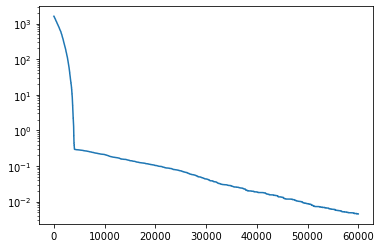

In [13]:
best_values =(one_one_ES(5,1e-3,rosenbrock,60000,2*np.ones(5)))

plt.semilogy(best_values)

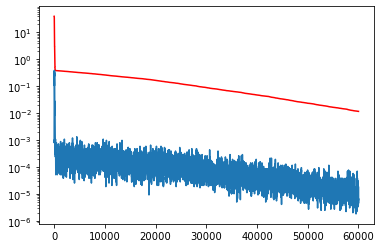

In [14]:
best_values,sigma_values =(one_one_ES_adap(5,1e-3,rosenbrock,60000,2*np.ones(5)))

plt.semilogy(best_values,'r')
plt.semilogy(sigma_values)